In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [12]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst[np.where(X_tst.sum(-1) >= 1)] = 0.0
print(X_tst.shape)

cfg = additive_1x2_uniform_triangle_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_triangle_01_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000


2019-01-31 16:29:13,836:INFO:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000
2019-01-31 16:29:17,182:INFO:TEST BATCH-0: t = 3.2213, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,188:INFO:TEST BATCH-1: t = 3.2248, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,196:INFO:TEST BATCH-2: t = 3.2296, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,200:INFO:TEST BATCH-3: t = 3.2312, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,204:INFO:TEST BATCH-4: t = 3.2340, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,213:INFO:TEST BATCH-5: t = 3.2409, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,217:INFO:TEST BATCH-6: t = 3.2425, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,220:INFO:TEST BATCH-7: t = 3.2444, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,224:INFO:TEST BATCH-8: t = 3.2465, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,234:INFO:TEST BATCH-9: t

2019-01-31 16:29:17,669:INFO:TEST BATCH-86: t = 3.5966, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,673:INFO:TEST BATCH-87: t = 3.6001, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,678:INFO:TEST BATCH-88: t = 3.6043, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,686:INFO:TEST BATCH-89: t = 3.6118, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,691:INFO:TEST BATCH-90: t = 3.6157, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,699:INFO:TEST BATCH-91: t = 3.6226, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,703:INFO:TEST BATCH-92: t = 3.6254, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,709:INFO:TEST BATCH-93: t = 3.6304, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,717:INFO:TEST BATCH-94: t = 3.6382, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,721:INFO:TEST BATCH-95: t = 3.6415, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-31 16:29:17,727:INFO:TEST BATCH-96: t = 3.

2019-01-31 16:29:18,194:INFO:TEST BATCH-172: t = 4.0545, Net_Loss: -0.079358, Revenue: 0.079358
2019-01-31 16:29:18,197:INFO:TEST BATCH-173: t = 4.0566, Net_Loss: -0.076524, Revenue: 0.076524
2019-01-31 16:29:18,202:INFO:TEST BATCH-174: t = 4.0618, Net_Loss: -0.073690, Revenue: 0.073690
2019-01-31 16:29:18,208:INFO:TEST BATCH-175: t = 4.0668, Net_Loss: -0.070855, Revenue: 0.070855
2019-01-31 16:29:18,215:INFO:TEST BATCH-176: t = 4.0720, Net_Loss: -0.068021, Revenue: 0.068021
2019-01-31 16:29:18,222:INFO:TEST BATCH-177: t = 4.0781, Net_Loss: -0.065187, Revenue: 0.065187
2019-01-31 16:29:18,227:INFO:TEST BATCH-178: t = 4.0824, Net_Loss: -0.062353, Revenue: 0.062353
2019-01-31 16:29:18,235:INFO:TEST BATCH-179: t = 4.0900, Net_Loss: -0.059519, Revenue: 0.059519
2019-01-31 16:29:18,239:INFO:TEST BATCH-180: t = 4.0932, Net_Loss: -0.056684, Revenue: 0.056684
2019-01-31 16:29:18,246:INFO:TEST BATCH-181: t = 4.0993, Net_Loss: -0.053850, Revenue: 0.053850
2019-01-31 16:29:18,249:INFO:TEST BATCH-

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)

In [6]:
from copy import copy
palette = copy(plt.cm.YlOrRd)
palette.set_over('w')
x = np.linspace(0, 1.0, D)
m = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1).reshape(D,D,2)
mask = m.sum(-1)>1.0

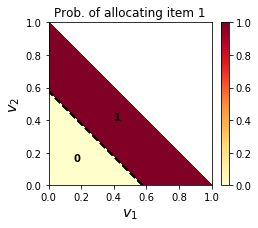

In [13]:
x1 = np.sqrt(1/3)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a1 = alloc[:, :, 0]
a1[mask] = 10.0
img = ax.imshow(a1[::-1,:], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)

plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

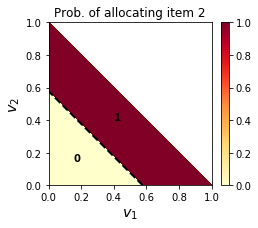

In [14]:
x1 = np.sqrt(1/3)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a2 = alloc[:, :, 1]
a2[mask] = 10.0
img = ax.imshow(a2[::-1, :], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)


plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)